# Bicol University Workshop: Preliminaries on Data (Part 2)
Prepared by: John Raymond B. Barajas

## Confidentiality Notice

This Jupyter Notebook and its contents are confidential and intended solely for the use of the intended recipient(s). If you have received this Notebook in error, please notify the sender immediately and delete it from your system. Any unauthorized use, disclosure, copying, or distribution of this Notebook is strictly prohibited.

The information contained in this Notebook may be privileged and confidential, and is intended only for the named recipient(s). Any review, dissemination, distribution, or copying of this Notebook by anyone other than the intended recipient(s) is strictly prohibited.

The content and opinions expressed in this Notebook are those of the author(s) and may not necessarily reflect the official policies or positions of the organization. Any views or opinions presented in this Notebook are solely those of the author(s) and do not necessarily represent those of the organization.

The security and integrity of the content of this Notebook cannot be guaranteed, and the author(s) shall not be held responsible for any unauthorized modification or alteration of the content.

Please treat this Notebook and its contents with the utmost confidentiality and refrain from sharing or distributing it without explicit permission from the author(s) or the organization.

Thank you for your cooperation and understanding.

## Install Necessary Libraries

In [1]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib
# !pip install seaborn
# !pip install ipywidgets
# !pip install scikit-learn
# !pip install scipy
# !pip install "numpy<1.24"

## Import Necessary Libraries

In [2]:
# import the necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Code for Columns

To navigate easily on the `entry_survey_data.csv`, the following are the codes used for the columns:

| QUESTION                                                        | CODE           |
|:-----------------------------------------------------------------|:----------------|
| Questionnaires                                                  | SURVEY_NAME    |
| Birthdate (Year, Month, Day)                                    | BIRTHDATE      |
| Sex at birth as appearing in the Certificate of Live Birth       | SEX            |
| Gender Preference                                               | GENDER         |
| Are you a member of an indigenous or cultural group?             | Q1             |
| Permanent or home address                                       | ADDRESS        |
| Estimated monthly family income                                 | FAMILY_INCOME  |
| Are you currently working either part-time or full-time?         | Q2             |
| School                                                          | SCHOOL         |
| Type of Institution                                             | SCHOOL_TYPE    |
| Academic Status                                                 | ACADEMIC_STATUS|
| Course specialization                                           | COURSE         |
| Which of the following are you currently availing this semester? (Specify other scholarship if applicable) | Q3 |
| Is this the first time that you are availing of FHE or TES?      | Q4             |
| How aware are you about the guidelines of the Universal Access to Quality Education (UAQTE)? | Q5 |
| Which of the following reasons do you think qualified you for Free Higher Education Program (FHE) or Tertiary Education Subsidy (TES)? Check as many as you think applies: | Q6 |
| Is the Free Higher Education Program (FHE) or Tertiary Education Subsidy (TES) enough to support your schooling? | Q7 |
| If Free Higher Education Program (FHE), Tertiary Education Subsidy (TES), and/or other scholarships were not available, how would you be supporting your studies? | Q8 |
| What aspect of your schooling should UAQTE include in its support? | Q9 |

## Read First the Data

In [3]:
# read Data
# change the file path for new data
file_path = 'entry_survey_raw_data.csv'
df = pd.read_csv(file_path)

## Check Metadata of Data

In [4]:
# check the first 5 rows of the data
df.head(5)

,SURVEY_NAME,BIRTHDATE,SEX,GENDER,Q1,Q1_YES,Q1_OTHER,ADDRESS,FAMILY_INCOME,Q2,...,Q3_Tertiary Education Subsidy (TES),Q6_My family socioeconomic status,Q6_My enrollment in state/government school,Q6_The type of course I am enrolled in,Q6_Others,Q9_Uniform,Q9_Books and other school materials,Q9_Subsidy for school activities,Q9_Others,AGE
0,Student Survey Entry,2002,Male,NaN,Yes,NaN,NaN,"Camarines Norte,Basud,Lidong","Less than 50,000",Yes,...,1.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,21
1,Student Survey Entry,2002,Female,NaN,No,NaN,NaN,"Albay,Camalig,Ilawod","Less than 50,000",No,...,NaN,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN,21
2,Student Survey Entry,2001,Female,NaN,No,NaN,NaN,"Albay,Daraga (Locsin),Sagpon","Within 50,000 - 100,000",No,...,NaN,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN,22
3,Student Survey Entry,2002,Male,NaN,No,NaN,NaN,"Albay,Bacacay,Barangay 13 (Pob.)","Less than 50,000",No,...,NaN,0.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,21
4,Student Survey Entry,2001,Female,NaN,No,NaN,NaN,"Camarines Sur,Bato,Santiago (Pob.)","Within 50,000 - 100,000",No,...,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,22


In [5]:
# check metadata of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SURVEY_NAME                                  750 non-null    object 
 1   BIRTHDATE                                    750 non-null    int64  
 2   SEX                                          750 non-null    object 
 3   GENDER                                       678 non-null    object 
 4   Q1                                           749 non-null    object 
 5   Q1_YES                                       4 non-null      object 
 6   Q1_OTHER                                     90 non-null     object 
 7   ADDRESS                                      748 non-null    object 
 8   FAMILY_INCOME                                748 non-null    object 
 9   Q2                                           748 non-null    object 
 10  SC

### Convert Columns into the Correct Data Types

#### Identify Numerical and Categorical Columns

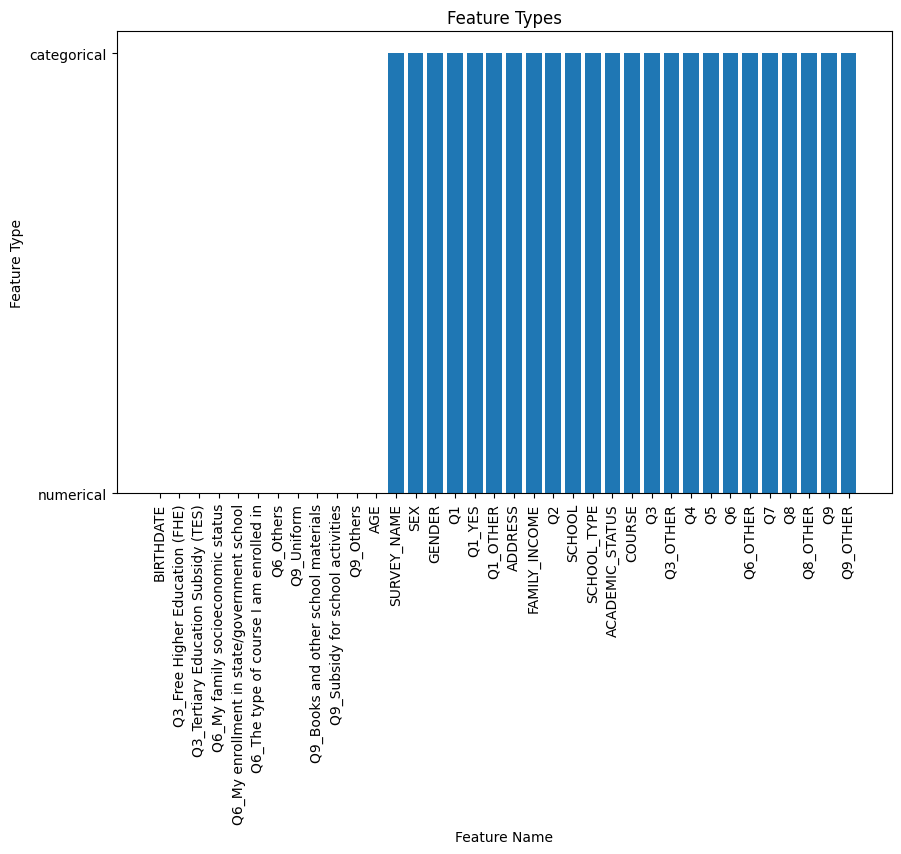

In [6]:
# identify features which are categorical
cat = df.select_dtypes(['object','category']).columns.to_list()

# identify features which are numerical
num = df.select_dtypes(['number']).columns.to_list()

# create dataframe identifying type of features
df_num_cat_col = pd.DataFrame(num+cat, columns=['Feature_Name'])
df_num_cat_col['Feature_Type'] = df_num_cat_col.where(
    ~df_num_cat_col['Feature_Name'].isin(cat),
    'categorical').where(df_num_cat_col['Feature_Name'].isin(cat),
                         'numerical')

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_num_cat_col['Feature_Name'], df_num_cat_col['Feature_Type'])
plt.xticks(rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Feature Type')
plt.title('Feature Types')

# display the plot
plt.show()

##### Identify the Correct Numerical and Categorical Columns Manually (Don't Forget to Edit the Cell Below)

In [7]:
# identify numerical columns manually
num_col = ['BIRTHDATE', 'Q3_Free Higher Education (FHE)',
           'Q3_Tertiary Education Subsidy (TES)', 'Q5',
           'Q6_My family socioeconomic status',
           'Q6_My enrollment in state/government school',
           'Q6_The type of course I am enrolled in', 'Q6_Others',
           'Q9_Uniform', 'Q9_Books and other school materials',
           'Q9_Subsidy for school activities', 'Q9_Others', 'AGE']

# identify categorical columns manually
cat_col = ['SURVEY_NAME', 'SEX', 'GENDER', 'Q1', 'Q1_YES', 'Q1_OTHER',
           'ADDRESS', 'FAMILY_INCOME', 'Q2', 'SCHOOL', 'SCHOOL_TYPE',
           'ACADEMIC_STATUS', 'COURSE', 'Q3', 'Q3_OTHER', 'Q4', 'Q6',
           'Q6_OTHER', 'Q7', 'Q8', 'Q8_OTHER', 'Q9', 'Q9_OTHER']

In [8]:
# convert data type of numerical columns to correct ones
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# check if columns are converted to the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SURVEY_NAME                                  750 non-null    object 
 1   BIRTHDATE                                    750 non-null    int64  
 2   SEX                                          750 non-null    object 
 3   GENDER                                       678 non-null    object 
 4   Q1                                           749 non-null    object 
 5   Q1_YES                                       4 non-null      object 
 6   Q1_OTHER                                     90 non-null     object 
 7   ADDRESS                                      748 non-null    object 
 8   FAMILY_INCOME                                748 non-null    object 
 9   Q2                                           748 non-null    object 
 10  SC

#### Identify Numerical and Categorical Columns for the Data (Demo for Automatic Selection)

In [10]:
# note that you have first to make sure that the columns are of the correct data type
# identify numerical columns automatically
num_col = df.select_dtypes(['number']).columns.to_list()

# identify categorical columns automatically
cat_col = df.select_dtypes(['object','category']).columns.to_list()

In [11]:
# check if the columns are identifed correctly
print('Numerical Columns')
print(num_col)
print('Categorical Columns')
print(cat_col)

Numerical Columns
['BIRTHDATE', 'Q5', 'Q3_Free Higher Education (FHE)', 'Q3_Tertiary Education Subsidy (TES)', 'Q6_My family socioeconomic status', 'Q6_My enrollment in state/government school', 'Q6_The type of course I am enrolled in', 'Q6_Others', 'Q9_Uniform', 'Q9_Books and other school materials', 'Q9_Subsidy for school activities', 'Q9_Others', 'AGE']
Categorical Columns
['SURVEY_NAME', 'SEX', 'GENDER', 'Q1', 'Q1_YES', 'Q1_OTHER', 'ADDRESS', 'FAMILY_INCOME', 'Q2', 'SCHOOL', 'SCHOOL_TYPE', 'ACADEMIC_STATUS', 'COURSE', 'Q3', 'Q3_OTHER', 'Q4', 'Q6', 'Q6_OTHER', 'Q7', 'Q8', 'Q8_OTHER', 'Q9', 'Q9_OTHER']


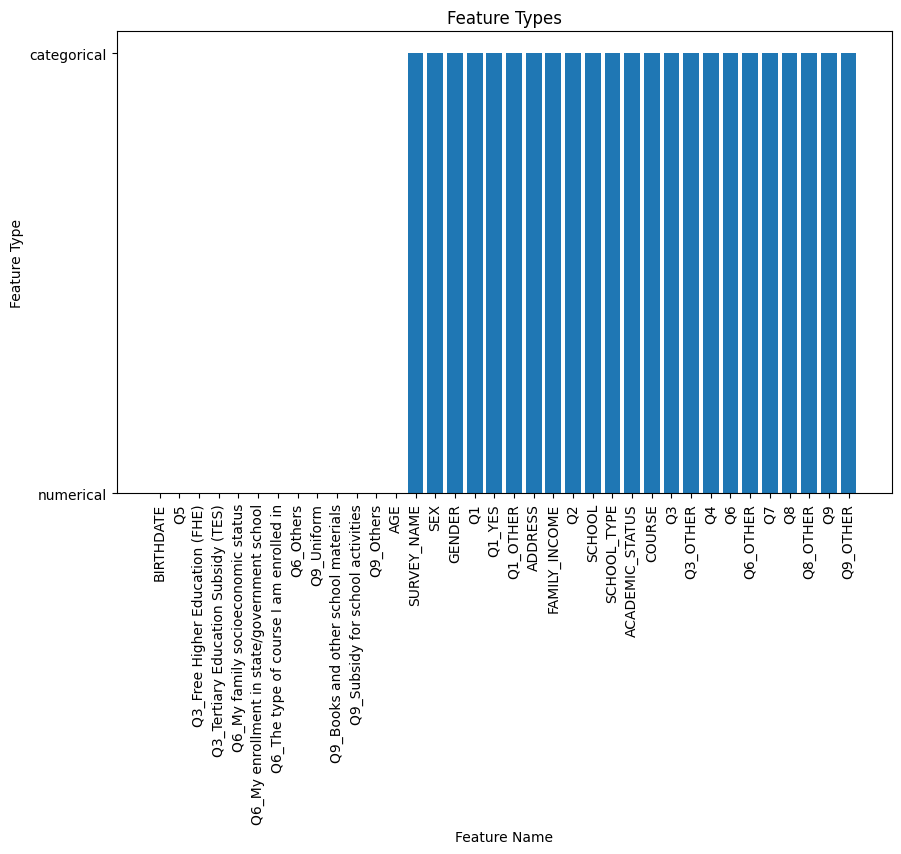

In [12]:
# identify features which are categorical
cat = df.select_dtypes(['object','category']).columns.to_list()

# identify features which are numerical
num = df.select_dtypes(['number']).columns.to_list()

# create dataframe identifying type of features
df_num_cat_col = pd.DataFrame(num+cat, columns=['Feature_Name'])
df_num_cat_col['Feature_Type'] = df_num_cat_col.where(
    ~df_num_cat_col['Feature_Name'].isin(cat),
    'categorical').where(df_num_cat_col['Feature_Name'].isin(cat),
                         'numerical')

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_num_cat_col['Feature_Name'], df_num_cat_col['Feature_Type'])
plt.xticks(rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Feature Type')
plt.title('Feature Types')

# display the plot
plt.show()

### Check for any Duplicate Records

In [13]:
# check for rows/records that are duplicated
df.duplicated().any()

True

In [14]:
# filter for the rows that are duplicated
df[df.duplicated()]

,SURVEY_NAME,BIRTHDATE,SEX,GENDER,Q1,Q1_YES,Q1_OTHER,ADDRESS,FAMILY_INCOME,Q2,...,Q3_Tertiary Education Subsidy (TES),Q6_My family socioeconomic status,Q6_My enrollment in state/government school,Q6_The type of course I am enrolled in,Q6_Others,Q9_Uniform,Q9_Books and other school materials,Q9_Subsidy for school activities,Q9_Others,AGE
77,Student Survey Entry,2001,Female,Woman,No,NaN,NaN,"Sorsogon,Magallanes","Less than 25,000",No,...,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,22
86,Student Survey Entry,2000,Female,Woman,No,NaN,NaN,"Sorsogon,City Of Sorsogon (Capital)","Less than 25,000",No,...,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,23
87,Student Survey Entry,2000,Female,Woman,No,NaN,NaN,"Sorsogon,City Of Sorsogon (Capital)","Less than 25,000",No,...,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,23
90,Student Survey Entry,2002,Male,Man,No,NaN,NaN,"Sorsogon,Magallanes","Less than 25,000",No,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,21
92,Student Survey Entry,2000,Male,LGBTQIA+,No,NaN,NaN,"Sorsogon,Matnog","Less than 25,000",No,...,NaN,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,23
107,Student Survey Entry,2000,Female,Woman,No,NaN,NaN,"Sorsogon,","Less than 25,000",No,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,23
115,Student Survey Entry,2000,Female,Woman,No,NaN,NaN,"Sorsogon,Bulan","Less than 25,000",No,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,23
259,Student Survey Entry,2003,Male,Man,No,NaN,NaN,"La Union,Bacnotan","Less than 25,000",No,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,20
316,Student Survey Entry,2002,Male,Man,No,NaN,NaN,"La Union,Bacnotan","Less than 25,000",No,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,21
536,Student Survey Entry,2001,Male,Woman,No,NaN,NaN,"Albay,Malilipot","Less than 25,000",Yes,...,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,22


In [15]:
# Do we drop the duplicates?
# The duplicate records should be inspected manually to validated if these are indeed duplicated records.
# Since this is a survey data, there might be incidences where the respondents will have the same answer
# Since there are only few data points, for the purpose of analysis, this notebook will keep all duplicates.

# run the code below to drop the duplicates
# df.drop_duplicates()

### Check for Missing Values

In [16]:
# check if columns have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SURVEY_NAME                                  750 non-null    object 
 1   BIRTHDATE                                    750 non-null    int64  
 2   SEX                                          750 non-null    object 
 3   GENDER                                       678 non-null    object 
 4   Q1                                           749 non-null    object 
 5   Q1_YES                                       4 non-null      object 
 6   Q1_OTHER                                     90 non-null     object 
 7   ADDRESS                                      748 non-null    object 
 8   FAMILY_INCOME                                748 non-null    object 
 9   Q2                                           748 non-null    object 
 10  SC

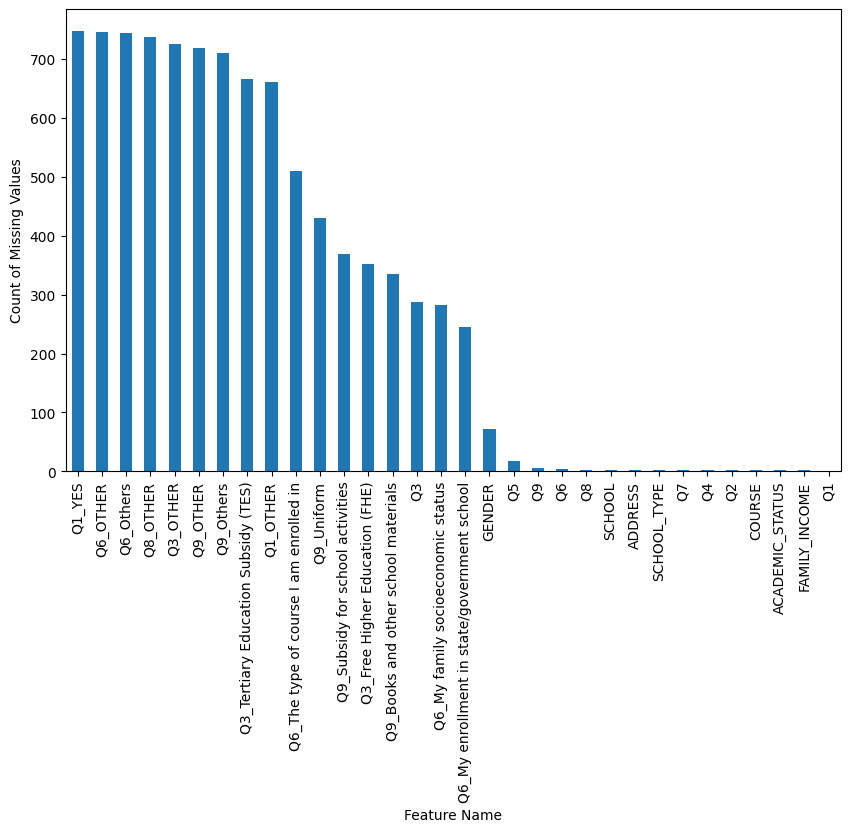

In [17]:
# create new data frame identifying columns with missing values
if df.isnull().sum().sum()>0:
    df_na = pd.DataFrame(df.isnull().sum(), columns=['count_na'])
    df_na = df_na[df_na['count_na']>0]

    # create bar plot for columns with missing values
    df_na['count_na'].sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
    plt.xlabel('Feature Name')
    plt.ylabel('Count of Missing Values')

    # display the plot
    plt.show()
else:
    print('The data does not contain missing values.')

### Simple Imputation on Missing Values

Since the `entry_survey_data.csv` data is a mixture of both numbers, categories, and text data points, imputation here will be very subjective and will primarily depend on domain expertise. In this case, there may be columns wherein imputation will not be logical (e.g., imputation of text).

#### Identify Numerical Columns that will be Imputed Manually

In [18]:
# check data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SURVEY_NAME                                  750 non-null    object 
 1   BIRTHDATE                                    750 non-null    int64  
 2   SEX                                          750 non-null    object 
 3   GENDER                                       678 non-null    object 
 4   Q1                                           749 non-null    object 
 5   Q1_YES                                       4 non-null      object 
 6   Q1_OTHER                                     90 non-null     object 
 7   ADDRESS                                      748 non-null    object 
 8   FAMILY_INCOME                                748 non-null    object 
 9   Q2                                           748 non-null    object 
 10  SC

In [19]:
# numerical columns to be imputed
num_col_impute = ['Q5']

#### Numerical Columns that Need not to be Imputed?

Do the following columns need to be imputed?
- Q3_Free Higher Education (FHE)
- Q3_Tertiary Education Subsidy (TES)
- Q6_My family socioeconomic status',
- Q6_My enrollment in state/government school',
- Q6_The type of course I am enrolled in'
- Q6_Others
- Q9_Uniform
- Q9_Books and other school materials
- Q9_Subsidy for school activities
- Q9_Others

Note that these columns are Check-All-That-Apply answers. Logically speaking, these numerical columns need not be "imputed". Technically speaking, we will subjectively "impute" `0`s in these since the missing values in such columns signify that the respondent did not check the column as an option.

In [20]:
# manually identify the numerical columns that need to be imputed with 0 values
num_col_0 = ['Q3_Free Higher Education (FHE)',
             'Q3_Tertiary Education Subsidy (TES)',
             'Q6_My family socioeconomic status',
             'Q6_My enrollment in state/government school',
             'Q6_The type of course I am enrolled in', 'Q6_Others',
             'Q9_Uniform', 'Q9_Books and other school materials',
             'Q9_Subsidy for school activities', 'Q9_Others']

#### Impute by "What?" Numerical Columns (non-zero) in the Data

Before imputing on numerical columns with non-zero values, check first if that column is either discrete or continuous data. In this case, `Q5` is in **Likert Scale** values. Because of this, the values in this column are not continuous but rather discrete data. Hence, the most logical imputation here should be using the mode (though this choice is still subjective and will depend on domain expertise).

In [21]:
# impute the mode of each column into the missing values for each column
df[num_col_impute] = df[num_col_impute].fillna(df[num_col_impute].mode().iloc[0])

In [22]:
# check for missing values for all numerical columns that may be imputed with non-zero values
df[num_col_impute].isnull().any().any()

False

#### Impute by Numerical Columns (zero) in the Data

In [23]:
# fill missing values with zeros for check-all-that-apply column options
df[num_col_0] = df[num_col_0].fillna(0)

In [24]:
# check for missing values with zeros for check-all-that-apply column options
df[num_col_0].isnull().any().any()

False

#### Identify Categorical Columns that will be Imputed Manually

A rule of thumb in imputing categorical columns is that text data is usually not imputed. Moreover, follow-up questions such that of `Q1_Yes` should be treated cautiously since missing values in such a column is usually indicative of "No" or "0".

Note that `Check-All-That-Apply` (CATA) questions should not be imputed like that of a categorical variable. New columns should created for these like what we did previously.

In [25]:
# check data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SURVEY_NAME                                  750 non-null    object 
 1   BIRTHDATE                                    750 non-null    int64  
 2   SEX                                          750 non-null    object 
 3   GENDER                                       678 non-null    object 
 4   Q1                                           749 non-null    object 
 5   Q1_YES                                       4 non-null      object 
 6   Q1_OTHER                                     90 non-null     object 
 7   ADDRESS                                      748 non-null    object 
 8   FAMILY_INCOME                                748 non-null    object 
 9   Q2                                           748 non-null    object 
 10  SC

In [26]:
# categorical columns to be imputed
cat_col_impute = ['GENDER', 'Q1', 'ADDRESS', 'FAMILY_INCOME', 'Q2', 'SCHOOL',
                  'SCHOOL_TYPE', 'ACADEMIC_STATUS', 'COURSE',
                  'Q4', 'Q7', 'Q8']

In [27]:
# impute the mode of each column into the missing values for each column
df[cat_col_impute] = df[cat_col_impute].fillna(df[cat_col_impute].mode().iloc[0])

In [28]:
# check for missing values for categorical columns
df[cat_col_impute].isnull().any().any()

False

### Final Check for Missing Values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SURVEY_NAME                                  750 non-null    object 
 1   BIRTHDATE                                    750 non-null    int64  
 2   SEX                                          750 non-null    object 
 3   GENDER                                       750 non-null    object 
 4   Q1                                           750 non-null    object 
 5   Q1_YES                                       4 non-null      object 
 6   Q1_OTHER                                     90 non-null     object 
 7   ADDRESS                                      750 non-null    object 
 8   FAMILY_INCOME                                750 non-null    object 
 9   Q2                                           750 non-null    object 
 10  SC

### Identify Number of Unique Values in all Features/Columns

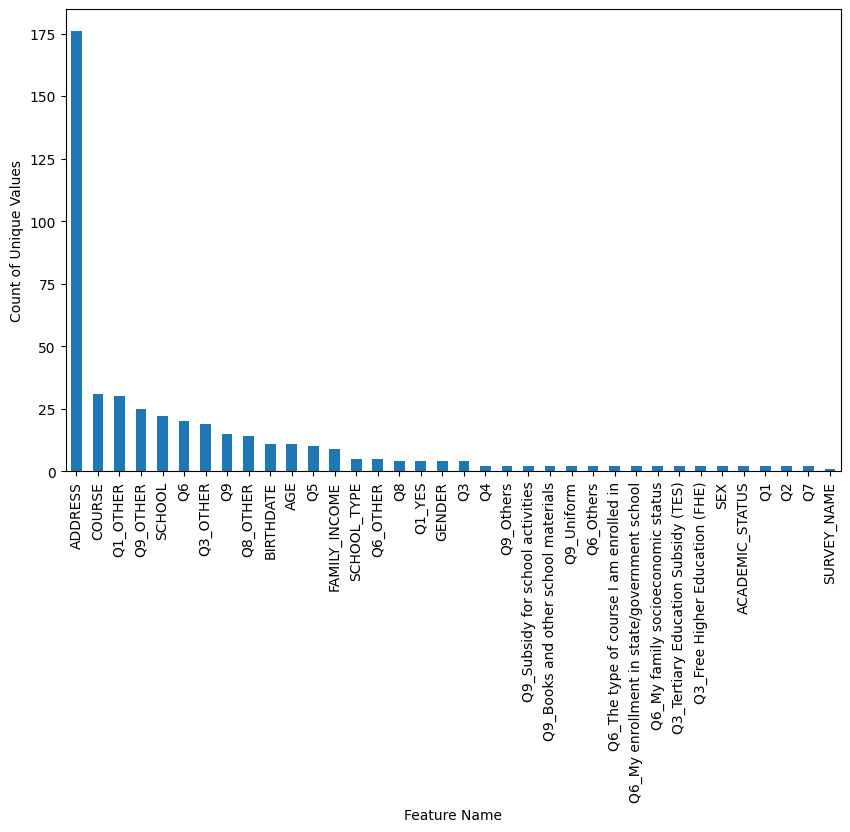

In [30]:
# create bar plot of unique values in each column
df.nunique().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.xlabel('Feature Name')
plt.ylabel('Count of Unique Values')

# display the plot
plt.show()

In [31]:
# check for columns that have less than or equal to 1 unique values
col_uniq_1 = list(df.columns[df.nunique() <= 1])
if len(col_uniq_1)>0:
    print(col_uniq_1)
else:
    print('No categorical columns that have less than or equal to 1 unique values.')

['SURVEY_NAME']


In [32]:
# if there is a column with only 1 unique value, remove the column with the code below
df.drop(col_uniq_1, axis=1, inplace=True)

### Further Considerations

Always inspect the metadata of the given dataset for unique identifier column (e.g. `EmployeeID`). Unless there is a specific purpose in mind in the process of data analysis, this column should be removed as this is only an identifier of a record.

Below is an example of a column that act as a unique identifier.

| Feature Number | Feature Name | Feature Description |
| :---:        | :---        | :---          |
|10	|EmployeeNumber	|A unique identifier for each record of an employee

## Save the Pre-processed Data as Comma Separated Values (CSV)

In [33]:
# save the preprocessed data as csv file
path_out = 'entry_survey_clean_data.csv'
df.to_csv(path_out, sep=',', index=False)

## Activity

Group by pair and re-run this notebook on the `exit_survey_raw_data.csv`. Note your observations and try to answer the following questions:
- What are the similarities and differences between the entry and exit survey data?
- In your own opinion, will filling up the missing values in the exit survey data a complex task? What do you think is a possible solution to make-up for the missing values?
- What impact could the presence or absence of missing values have on the analysis and interpretation of the exit survey data?

Presentation Instructions:

- Prepare a PowerPoint (PPT) presentation with 1-2 slides based on your findings.
- 2-3 groups will be called to present their findings.
- Each group is given 3 minutes to present their findings.
- Ensure your presentation includes:
    - Slide 1: Introduction (briefly explain the purpose of the dataset)
    - Slide 2: Findings

To navigate easily on the `exit_survey_data.csv`, the following are the codes used for the columns:

| QUESTION                                                                                 | CODE            |
|:------------------------------------------------------------------------------------------|:-----------------|
| Questionnaires                                                                           | SURVEY_NAME     |
| Birthdate (Year, Month, Day)                                                             | BIRTHDATE       |
| Sex at birth as appearing in the Certificate of Live Birth                                | SEX             |
| Gender Preference:                                                                       | GENDER          |
| Are you a member of an indigenous or cultural group?                                      | Q1              |
| Permanent or home address                                                                | ADDRESS         |
| Family’s socioeconomic status, Estimated monthly family income:                           | FAMILY_INCOME   |
| Are you currently working either part-time or full-time?                                  | Q2              |
| School                                                                                   | SCHOOL          |
| Type of Institution                                                                      | SCHOOL_TYPE     |
| Course graduated from:                                                                   | COURSE          |
| Inclusive years of study                                                                 | STUDY_YEARS     |
| Did you shift courses? (If Yes, please specify your previous course)                      | Q3              |
| "Were you informed about the obligations that you may have after graduation because you availed Free Higher Education Program (FHE), Tertiary Education Subsidy (TES), or other scholarships?" | Q4 |
| "What are your plans after graduation or board exams? Please check all that applies."    | Q5              |
| On a scale of 1 to 10, rate your satisfaction on the delivery of the Universal Access to Quality Education (UAQTE)? (1 as the lowest and 10 is the highest) | Q6 |
| On a scale of 1 to 10, how beneficial was UAQTE to you?                                   | Q7              |
| In 3-4 sentences, write your experience as one of the beneficiaries of the UAQTE.         | Q8              |
| Do you feel that the delivery of FHE or TES can still be improved?                        | Q9              |
| Write a short description of the impact of UAQTE on you and your family.                  | Q10             |
| What issues and challenges did you encounter?                                             | Q11             |
| How did you cope with these issues and challenges?                                        | Q12             |
| What is your overall feedback of the implementation of the UAQTE?                         | Q13             |
| Which of the following did you avail in college? Select all that applies:                 | Q14             |